<a href="https://colab.research.google.com/github/SMKIDRaadet/SMKID_Analysis/blob/main/SMKID_Deltagere.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#En undersøgelse af deltagere til S/M-KID Rådsmøder i tidens løb.

In [272]:
import pandas as pd
import numpy as np
import os

from google.colab import drive
drive.mount('/content/drive')

from google.colab import auth
auth.authenticate_user()

import gspread
from oauth2client.client import GoogleCredentials

gc = gspread.authorize(GoogleCredentials.get_application_default())

if 'S M-KID Rådet' not in os.listdir('/content/drive/My Drive/'):
  raise ValueError('S/M-KID Rådets folder not in your Google Drive.')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [273]:
#URLS
deltagerlister = {'15/11/2016' : 'https://docs.google.com/spreadsheets/d/1-22xUBkwsz0bXFU1oqD3XV6aesFWgDgIJ6QC-POBd2c',
                  '10/01/2017' : 'https://docs.google.com/spreadsheets/d/1nnlcnO9OGNH4ZPFTaVR9zwH6cFF2XplwCtIP8aCCDkU',
                  '01/02/2017' : 'https://docs.google.com/spreadsheets/d/1moKB5i4gq0cnGC2Pw7ctXrAZrGcWwi5X6d-ASvcFMXU',
                  '01/03/2017' : 'https://docs.google.com/spreadsheets/d/1U_Rx2N0zp8ZLFT5YCFxhUMFcl8PR7IICnN9rEQ8332E',
                  '28/03/2017' : 'https://docs.google.com/spreadsheets/d/1f8-TghVbmSi28kTcNO2B5rfeV3uqwAYh1N5R0RGiDfg',
                  '03/05/2017' : 'https://docs.google.com/spreadsheets/d/1ojQhJhSD9W_pqHRPvXY0rbh-F0AdWPe_qCxeCJt4s84',
                  '13/08/2017' : 'https://docs.google.com/spreadsheets/d/1JNo2EpdA8U2lsg7WsRDliKhjYJqDXdLSBlm9-BP2Ry4',
                  '02/10/2017' : 'https://docs.google.com/spreadsheets/d/1soWe_ZWOQE8pEX4x5rB72M1b318AjrdR0XLdUQxzBK8',
                  '25/11/2017' : 'https://docs.google.com/spreadsheets/d/1TFQcwDc2BU43QggLlDDFBL_mG7CMlhJJF2iH3xtPDQI',
                  '10/01/2017' : 'https://docs.google.com/spreadsheets/d/14jzbJ_30ViXe_okBAbtw2OsSKyurqpm-vMTFkOLLI2Y',
                  '30/01/2018' : 'https://docs.google.com/spreadsheets/d/12b-uEMi39n1Xl5dqbbu-TbuhqeNzzrLi7M5e3Gi134U',
                  '13/03/2018' : 'https://docs.google.com/spreadsheets/d/1uxnsjQIEwkwP83xuhFs8G7Mvfy5FrssrN5zmtOfds0g',
                  '24/04/2018' : 'https://docs.google.com/spreadsheets/d/1x5jq9OI7qMCa8rtn-Oc_x7YE-EgfQcNsAjILG6oFzNE',
                  '12/06/2018' : 'https://docs.google.com/spreadsheets/d/132TkeTs-rtp-yigA8xPI2FZZDU04z5zegBy8ffnpo6E',
                  '11/09/2018' : 'https://docs.google.com/spreadsheets/d/1-0En5Ag3hZH5Otv4HoK_xd_mEPPH9Yjn0Hm70z_ATLI',
                  '03/10/2018' : 'https://docs.google.com/spreadsheets/d/1mU3wThLNmWCmB2Gpcdvgjw9JEP6wngJjs-1F4DAiVyA',
                  '23/10/2018' : 'https://docs.google.com/spreadsheets/d/151o4cOU2gInzwPx1_U8Cp-a6JjAhhThdftU5tsY0rTU',
                  '20/11/2018' : 'https://docs.google.com/spreadsheets/d/1IiNhi9rzJFeuGnBF8qgAeSW8-3yLgujQoBx9Nnz_ZaA',
                  '08/01/2019' : 'https://docs.google.com/spreadsheets/d/1gaZYR1ubOFD_5bKbYWik1fNmXYP0rXbu6R2veG6DmXM',
                  '06/02/2019' : 'https://docs.google.com/spreadsheets/d/1WsGAAFXT5Zwk4EJPE7gUwkXeJHR9xFRJ7wfP1OkL4IA',
                  '02/04/2019' : 'https://docs.google.com/spreadsheets/d/1roxMso6DTVCbgUo14UjlZ4YiQn1QawmD0nrpfNwBDhs',
                  '18/06/2019' : 'https://docs.google.com/spreadsheets/d/171fm1yCk-CkSecTrVtUkf4Lcc__4n-wYX8pl6CEsF_Q',
                  '09/09/2019' : 'https://docs.google.com/spreadsheets/d/1Bm_ZggnSolX9U26VDGyzZkbCutkSQ73FAxBUlGnDfnU',
                  '09/10/2019' : 'https://docs.google.com/spreadsheets/d/1V1IHljGNk630_QKLr1UpAJLvIV_WkDLnx7kK7xnGsLk',
                  '28/10/2019' : 'https://docs.google.com/spreadsheets/d/17kvV8Czjk9fPXsf6LW_BDMf1YHW41exJpAsSwuDejCc',
                  '25/11/2019' : 'https://docs.google.com/spreadsheets/d/1yaA-1FYlCIQDpaT0Ku2Y9srujduznwtJWxBJ-7K1kms',
                  '14/01/2020' : 'https://docs.google.com/spreadsheets/d/1lMi8MbW7SJqehiROaySjE7V6eUc-ScTKnaM1dBoLN70',
                  '03/02/2020' : 'https://docs.google.com/spreadsheets/d/1pUF7H2KYX_k7lBgNGRzW4pnFXHC8gH4cgyCoOyV6fdA',
                  '02/03/2020' : 'https://docs.google.com/spreadsheets/d/1fijTWsC4CdnTgwMt21HakZxSdcTzqWqqO2-_w-E_aQ0',
                  '23/03/2020' : 'https://docs.google.com/spreadsheets/d/1sHOTfAu4px05cS1GlxuDMT5KrCCMRPhhYSvAq0hsx6c',
                  '28/04/2020' : 'https://docs.google.com/spreadsheets/d/1Rm8KYKMs8sDlkkMpIkrdb5TqS8-VQsHoh9bl-DHlKzA',
                  '07/06/2020' : 'https://docs.google.com/spreadsheets/d/1X0oTxWk3cBUHfEYXOLSzoObD9xIUTSLmgCxa-ty7J84',
                  '14/09/2020' : 'https://docs.google.com/spreadsheets/d/16PDwASOuUfmcC4sFNirVQSvVtK3tII8crOSLvxCY0Lo',
                  '28/09/2020' : 'https://docs.google.com/spreadsheets/d/1kq55taNGA8W2JU_Qbnjn0NVrwSR3yORsXvp9-8qFfR4'}

In [378]:
def load_deltagerliste(url, date):
  import pandas as pd
  global gc

  sh = gc.open_by_url(url)
  df = pd.DataFrame(sh.get_worksheet(0).get_all_values())

  #Remove the column-row
  df = df[1:]

  #Grab the first 5 columns
  df = df.iloc[:,:5]

  df.columns = ['Tidsstempel', 'Fulde navn', 'Studienummer', 'Studieretning', 'Konstitueret']
  
  df['Dato'] = date

  #Set invalid studynumbers to nan.
  import re
  r = re.compile(r's\d{6}')
  df['Studienummer'] = df['Studienummer'].str.lower()
  df['Studienummer'] = df['Studienummer'].str.strip()
  
  df['Studienummer'].loc[df['Studienummer'].apply(lambda x : not bool(r.match(x)))] = np.nan

  df = df.drop_duplicates(subset=['Studienummer'])

  return df

dates = list(deltagerlister.keys())

for i in range(33):
  print(f'Loading sheet located at {deltagerlister[dates[i]]}')
  if i==0:
    df = load_deltagerliste(deltagerlister[dates[i]], dates[i])
  else:
    df = df.append(load_deltagerliste(deltagerlister[dates[i]], dates[i]))


Loading sheet located at https://docs.google.com/spreadsheets/d/1-22xUBkwsz0bXFU1oqD3XV6aesFWgDgIJ6QC-POBd2c
Loading sheet located at https://docs.google.com/spreadsheets/d/14jzbJ_30ViXe_okBAbtw2OsSKyurqpm-vMTFkOLLI2Y
Loading sheet located at https://docs.google.com/spreadsheets/d/1moKB5i4gq0cnGC2Pw7ctXrAZrGcWwi5X6d-ASvcFMXU
Loading sheet located at https://docs.google.com/spreadsheets/d/1U_Rx2N0zp8ZLFT5YCFxhUMFcl8PR7IICnN9rEQ8332E
Loading sheet located at https://docs.google.com/spreadsheets/d/1f8-TghVbmSi28kTcNO2B5rfeV3uqwAYh1N5R0RGiDfg
Loading sheet located at https://docs.google.com/spreadsheets/d/1ojQhJhSD9W_pqHRPvXY0rbh-F0AdWPe_qCxeCJt4s84
Loading sheet located at https://docs.google.com/spreadsheets/d/1JNo2EpdA8U2lsg7WsRDliKhjYJqDXdLSBlm9-BP2Ry4
Loading sheet located at https://docs.google.com/spreadsheets/d/1soWe_ZWOQE8pEX4x5rB72M1b318AjrdR0XLdUQxzBK8
Loading sheet located at https://docs.google.com/spreadsheets/d/1TFQcwDc2BU43QggLlDDFBL_mG7CMlhJJF2iH3xtPDQI
Loading sheet locat

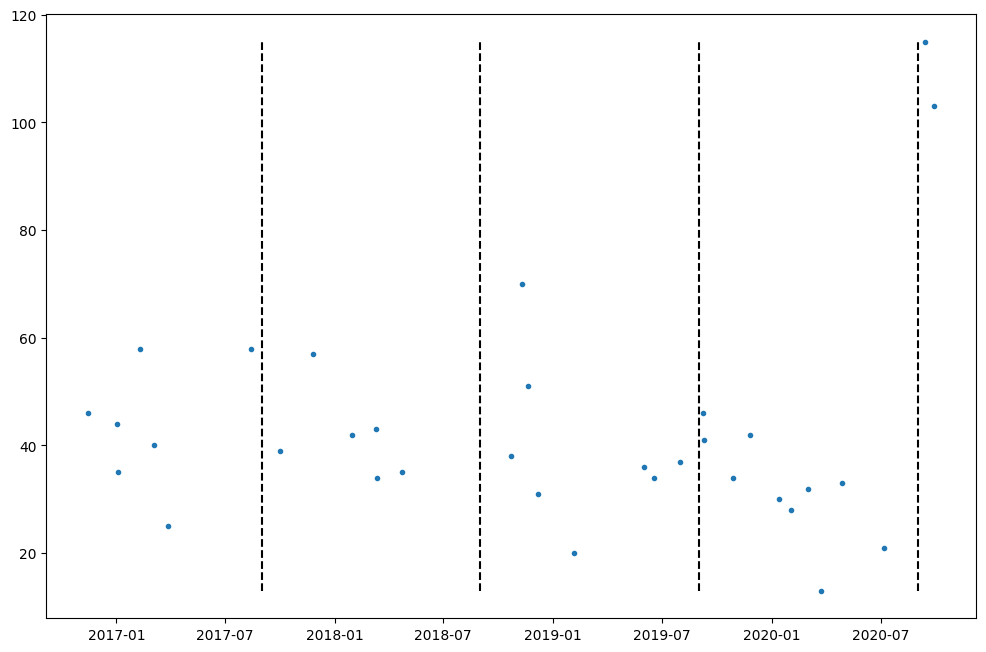

In [379]:
meeting_attendance = df.groupby('Dato',as_index=False).count()
meeting_attendance = meeting_attendance.iloc[:,:2]
meeting_attendance.columns = ['Dato','Participants']
meeting_attendance['Dato'] = pd.to_datetime(meeting_attendance['Dato'])
meeting_attendance = meeting_attendance.sort_values('Dato')

import matplotlib.pyplot as plt

fig=plt.figure(figsize=(12,8), dpi= 100)
plt.plot('Dato','Participants', '.', data=meeting_attendance)

#Add vertical lines at first monday in September.
import datetime
def plot_september(yr):
  plt.vlines(datetime.date(yr, 9, 1), min(meeting_attendance['Participants']), \
                                        max(meeting_attendance['Participants']), linestyle='--')

plot_september(2017)
plot_september(2018)
plot_september(2019)
plot_september(2020)

Find den, der har deltaget til flest møder.

In [446]:
#Replace everyone's name with the first occurance of their name
meetings = df.groupby('Studienummer',as_index=False).count().iloc[:,:2]
meetings.columns = ['Studienummer', 'Antal møder']

name_and_studynumber = df[['Fulde navn', 'Studienummer']]
name_and_studynumber = name_and_studynumber.drop_duplicates(subset='Studienummer')
name_and_studynumber = name_and_studynumber.dropna()

df2 = pd.merge(left=name_and_studynumber, right=meetings, on='Studienummer')
df2 = df2.sort_values('Antal møder',ascending=False)

Antallet 

In [448]:
v1 = np.asarray(df2['Antal møder'].value_counts())
v2 = np.sort(df2['Antal møder'].unique())

v1 = (v1/np.cumsum(v1))*100

df3 = pd.DataFrame({'Antal møder' : v2, 'Procent' : v1})
df4 = pd.merge(left=df2, right=df3, on='Antal møder')
df4['Top'] = df4['Procent'].apply(lambda x : str(round(x,2)) + '%')
df4 = df4.drop('Procent',axis=1)
df4

,Fulde navn,Studienummer,Antal møder,Top
0,Rasmus Ørtoft Aagaard,s164419,29,0.31%
1,Viktor Stenby Johansson,s174483,25,0.31%
2,Josephine Kyvsgaard Budolfsen,s164418,24,0.31%
3,Matteo Christian Vogt,s174474,23,0.31%
4,Clara Chini Nielsen,s164213,23,0.31%
5,Toke Bøgelund-Andersen,s164202,21,0.32%
6,Daniel Jakob Hildebrand,s154410,20,0.32%
7,Nicolai Søborg,s134832,19,0.32%
8,Peter Riis Christiansen,s184221,18,0.64%
9,Niels Kjær Erbsøll,s183903,18,0.64%
